### Source : http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

In [2]:
path = "/Users/ecem/Desktop/phonocardiogram/data/TV/present"

In [3]:
waves = np.load(path + "/present_TV_waves_10sec.npy", allow_pickle= True)

In [4]:
n = waves.shape[0]

In [5]:
import librosa as lbs

In [6]:
lbs.feature.mfcc(y=waves[0], sr=4000, win_length = 100, n_mfcc=13).shape

(13, 79)

In [7]:
lbs.feature.mfcc(y=waves[0], sr=4000, win_length = 100, n_mfcc=13)[0].mean()

-591.8173

In [8]:
mfccs = lbs.feature.mfcc(y=waves[0], sr=4000, win_length = 100, n_mfcc=13)

In [9]:
import librosa.display

[Text(0.5, 1.0, 'MFCC')]

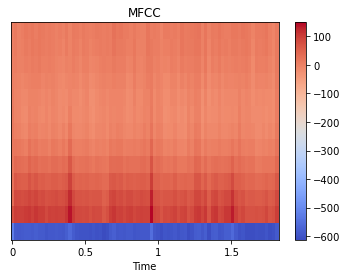

In [10]:
>>> import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots(nrows=1, sharex=True)
>>> img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
>>> fig.colorbar(img, ax=[ax])
>>> ax.set(title='MFCC')

In [11]:
mfccs = np.empty((n, 13))
for i in range(waves.shape[0]):
    mfcc = lbs.feature.mfcc(y=waves[i], sr=4000, win_length = 100, n_mfcc=13)
    for j in range(13):
        mfccs[i, j] = mfcc[j].mean()
    

In [12]:
mfccs.shape

(1205, 13)

In [13]:
import pandas as pd

In [14]:
columns = []
for i in range(13):
    columns.append("{}'th mfcc".format(i))

In [15]:
mfccs_df = pd.DataFrame(mfccs, columns = columns)

In [16]:
mfccs_df

,0'th mfcc,1'th mfcc,2'th mfcc,3'th mfcc,4'th mfcc,5'th mfcc,6'th mfcc,7'th mfcc,8'th mfcc,9'th mfcc,10'th mfcc,11'th mfcc,12'th mfcc
0,-591.817322,92.014435,75.640770,53.285835,29.523932,9.205683,-4.313620,-9.840879,-8.431937,-2.754433,3.939606,8.896379,10.612140
1,-608.390564,108.873070,87.958176,59.561840,29.968021,5.514747,-9.652433,-14.440272,-10.754220,-2.465962,6.093056,11.587217,12.564015
2,-552.140869,86.704597,71.681267,51.108711,29.040089,9.846354,-3.389795,-9.445189,-9.057382,-4.415343,1.676179,6.704634,9.119080
3,-582.783752,96.320496,80.237808,57.960247,34.288982,13.675554,-0.654058,-7.476874,-7.710306,-3.748581,1.500152,5.526372,6.915148
4,-563.395081,93.641495,76.892998,54.675968,31.853073,12.865392,0.165991,-5.821665,-6.263361,-3.225020,0.963691,4.295860,5.553706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,-515.046997,100.614891,85.969406,66.045433,44.804813,26.420040,13.684677,7.527235,7.023386,9.991295,13.837909,16.392942,16.453938
1201,-553.679016,117.386978,97.879944,71.702789,44.700024,22.428585,8.171965,2.512529,3.696732,8.630657,14.011208,17.298475,17.285185
1202,-505.021606,97.101532,83.499519,65.035126,45.093800,27.471945,14.859971,8.360435,7.375756,10.039680,13.933534,16.875832,17.503557
1203,-496.810760,109.279297,91.542336,67.402847,41.922855,20.311941,6.028016,0.111621,1.211944,6.383330,12.239496,16.077532,16.579428


In [17]:
mfccs_df.to_csv("/Users/ecem/Desktop/phonocardiogram/data/TV/present/TV-mfcc.csv")